## Sod's Test Problem : The Shock Tube

##### Assignment
##### Laurent Pétré & Ilan Renous

We are going to describe the evolution of the pressure, the speed and density of a gaz in a shock tube using the Richtemyer method. Let's get strated!

In [1]:
# We import the libraries we will need
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline
from JSAnimation.IPython_display import display_animation
import matplotlib.animation as anim

### The shock Tube

A shock tube is an idealized device that generates a one-dimensional shock wave in a compressible gas. The setting allows an analytical solution of the Euler equations, which is very useful for comparing with the numerical results to assess their accuracy.

It consist in a tube separated in two part by a infinitely thin, rigid diaphragm. The regions on both side of that separation have different initial pressure and density and the gas is initailly at rest. At time $t = 0.0 s$, the diaphragm is ruptured instantaneously. An unsteady flow is thus establish consisting of:

* a shock wave traveling to the right
* an expansion wave traveling to the left
* a moving contact discontinuity

This problem can be illustared as follow:
![shocktube](../../lessons/03_wave/figures/shocktube.png)

###  Sock Tube's Equations 

Using Euler equation for a inviscid fluid with density $\rho$ and pressure $p$, that consist of the conservation laws of mass and momentum, and the energy equation, we get:

$$
\frac{\partial }{\partial t} \vec{\mathbf{u}} + \frac{\partial }{\partial x} \vec{\mathbf{f}} = 0
$$

where $$
\vec{\mathbf{u}} = \left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]$$

and $$
\vec{\mathbf{f}} = \left[ \begin{array}{c}
\rho u \\
\rho u^2 + p \\
(\rho e_T + p) u \\ \end{array} \right]
$$

Using now the equation state of an ideal gas, which is

$$e = e(\rho, p) = \frac{p}{(\gamma -1) \rho},$$

where $\gamma = 1.4$ is a reasonable value to model air.

We can now express $p$ as 

$$p = (\gamma -1)\left(\rho e_T - \frac{\rho u^2}{2}\right).$$

Now, we need to express  $ \vec{\mathbf{f}}= 
\left[ \begin{array}{c}
f_1 \\
f_2 \\
f_3 \\ \end{array} \right]$ in terms of $\vec{\mathbf{u}} = 
\left[ \begin{array}{c}
u_1 \\
u_2 \\
u_3 \\ 
\end{array} \right]$

Using the expressions above and after some algebraic manipulations, we finaly get

$$\vec{\mathbf{f}} = \left[ \begin{array}{c}
f_1 \\
f_2 \\
f_3 \\ \end{array} \right] =
\left[ \begin{array}{c}
u_2\\
\frac{u^2_2}{u_1} + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1} \right) \\
\left(u_3 + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1}\right) \right) \frac{u_2}{u_1}\\ \end{array}
\right]$$



##### Implementation

To solve the problem in Python, we will need to define the vector $\vec{f}$ which is a function of vector $\vec{u}$ :

In [2]:
def f(u, gamma = 1.4):
    """
    Returns the flux and corresponding values for 
    given density, velocity and pressure.
    
    Parameters
    ----------
    u: array[N, 3] of floats
        array of N values of density, velocity and pressure
        
    gamme: float
        constant of the gas used in the problem

    Returns
    -------
    f_u: array[N, 3] of floats
        computed value for flux and corresonding values
    """

    f_u = npy.empty_like(u)

    f_u[:,0] = u[:,1]
    f_u[:,1] = (u[:,1]**2)/u[:,0] + \
        (gamma - 1)*(u[:,2] - 0.5*((u[:,1]**2)/u[:,0]))
    f_u[:,2] = (u[:,2] + \
                (gamma - 1)*(u[:,2] - 0.5*((u[:,1]**2)/u[:,0]))\
               )*(u[:,1]/u[:,0])

    return f_u

### Initial conditions

In a tube spanning from $x = -10 \text{m}$ to $x = 10 \text{m}$ with the rigid membrane at $x = 0 \text{m}$, we have the following initial gas states:

$$\vec{IC}_L = \left[ \begin{array}{c}
\rho_L \\ u_L \\ p_L \\ \end{array}\right] = 
\left[ \begin{array}{c}
1\ kg/m^3 \\ 0\ m/s \\ 100\ kN/m^2 \\ \end{array}\right]$$

$$\vec{IC}_R = \left[ \begin{array}{c}
\rho_R \\ u_R \\ p_R \\ \end{array}\right] = 
\left[ \begin{array}{c}
0.125\ kg/m^3 \\ 0\ m/s \\ 10\ kN/m^2 \\ \end{array}\right]$$

where $\vec{IC}_L$ are the initial density, velocity and pressure on the left side of the tube membrane and $\vec{IC}_R$ are the initial density, velocity and pressure on the right side of the tube membrane.

##### Implementation

In Python, that gives us :

In [3]:
# Initial conditions in terms of density, speed and pressure
ICL = npy.array([1, 0, 100000])
ICR = npy.array([0.125, 0, 10000])

### The Richtmyer method

To solve this problem, we are going tu use the Richtmyer method, which is given by:

$$
\vec{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} = \frac{1}{2} \left( \vec{\mathbf{u}}^n_{i+1} + \vec{\mathbf{u}}^n_i \right) - 
\frac{\Delta t}{2 \Delta x} \left( \vec{\mathbf{f}}^n_{i+1} - \vec{\mathbf{f}}^n_i\right) $$ $$
\vec{\mathbf{u}}^{n+1}_i = \vec{\mathbf{u}}^n_i - \frac{\Delta t}{\Delta x} \left(\vec{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} - \vec{\mathbf{f}}^{n+\frac{1}{2}}_{i-\frac{1}{2}} \right)
$$


The flux vectors used in the second step are obtained by evaluating the flux functions on the output of the first step:

$$\vec{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} = \vec{\mathbf{f}}\left(\vec{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}}\right).$$

##### Implementation

In [4]:
def solve(u, f, dt, dx, nt):
    """
    Compute the solution of the partial differential equation : 
    du/dt + df(u)/dx = 0 using Richtmeyer method.
    
    Parameters
    ----------
    u: array[nt+1, N, M] of floats
        array used to save the datas
        initial condition must be set in u[0, :, :]

    f(u): function of an array of floats returning an array of floats
        see de definition of the PDE

    dt: float
        time step

    dx: float
        space step

    nt: integer
        number of iterations
    """

    uh = u[0].copy()

    for n in range(0, nt):
        Fn = f(u[n])

        # Predictor
        uh[:-1] = 0.5*(u[n, 1:]+u[n, :-1]) - 0.5*dt/dx*(Fn[1:]-Fn[:-1])
        Fnh = f(uh)

        # Corrector
        u[n+1, 1:] = (u[n, 1:] - dt/dx*(Fnh[1:]-Fnh[:-1]))
        u[n+1, 0] = u[0, 0]

### Simulation

Now, we have all the tools to solve the problem.

In [11]:
# Simulation conditions
dx = 0.25
nx = 81
x = npy.linspace(-10, 10, nx)

dt = 0.0002
t_to_sim = 0.01
nt = int(t_to_sim/dt)

gamma = 1.4

# Initial conditions in the form of u
u0 = npy.empty((nx,3))
u0[:40, 0] = ICL[0]
u0[40:, 0] = ICR[0]
u0[:40, 1] = ICL[0]*ICL[1]
u0[40:, 1] = ICR[0]*ICR[1]
u0[:40, 2] =  ICL[2]/(gamma - 1) + 0.5*ICL[0]*ICL[1]**2
u0[40:, 2] = ICR[2]/(gamma - 1) + 0.5*ICR[0]*ICR[1]**2

# Array to save the datas
u = npy.empty((nt+1, nx, 3))
u[0] = u0.copy()

solve(u, f, dt, dx, nt)
u_out = u[nt, 50, :]

print("Density : ", u_out[0])
print("Velocity : ", u_out[1]/u_out[0])
print("Pressure : ", (u_out[2] - \
    0.5*u_out[0]*(u_out[1]/u_out[0])**2)*(gamma - 1))

Density :  0.374691402648
Velocity :  292.611471527
Pressure :  30250.8901676


### Animation

Let's take a look at the evolution of our variables with some animations.

Here is an animation of the evolution of the velocity of the gas along the tube.


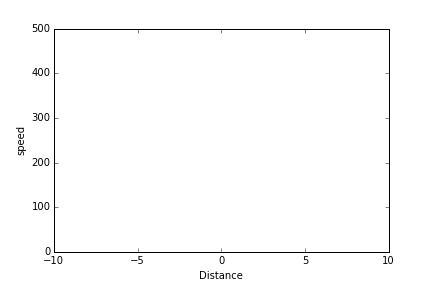
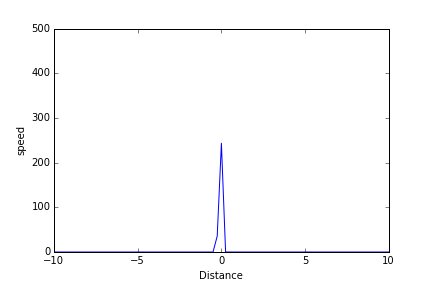
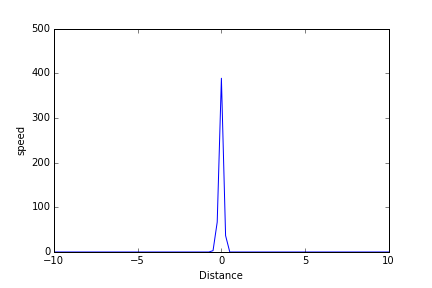
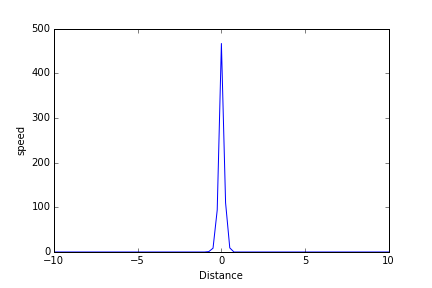
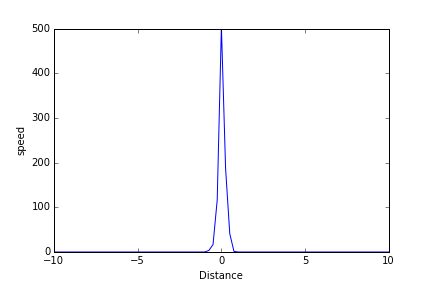
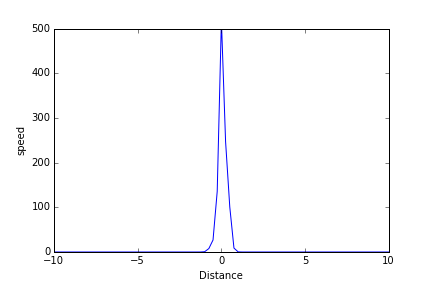
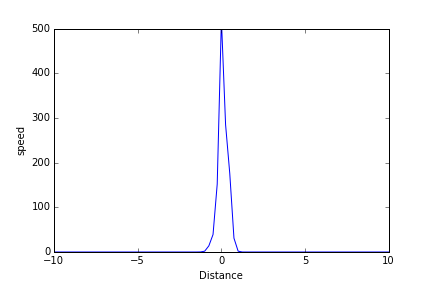
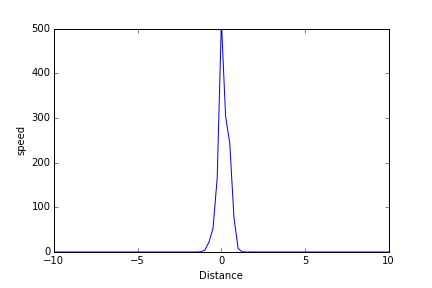
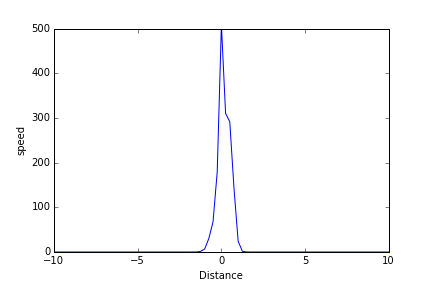
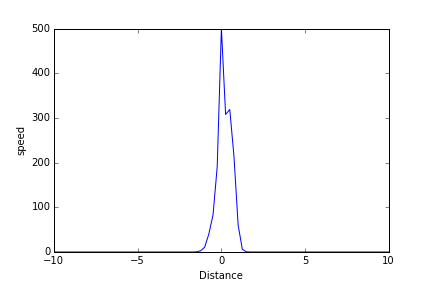
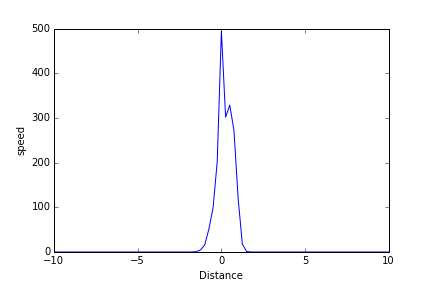
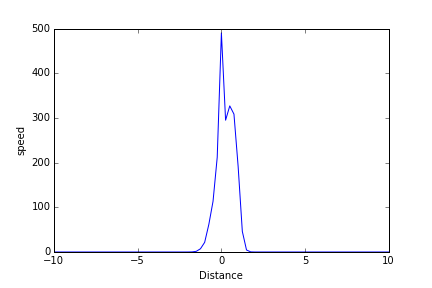
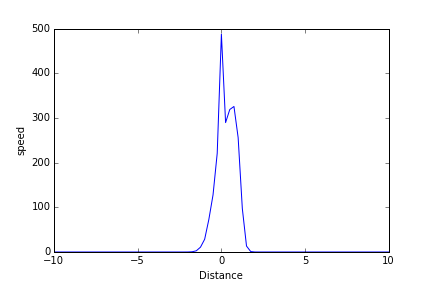
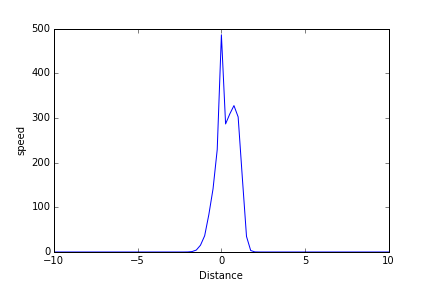
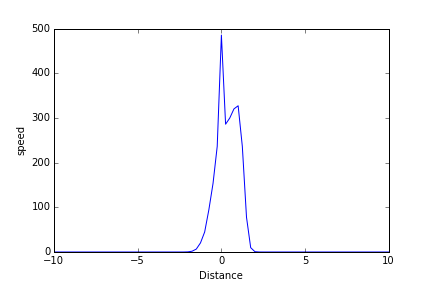
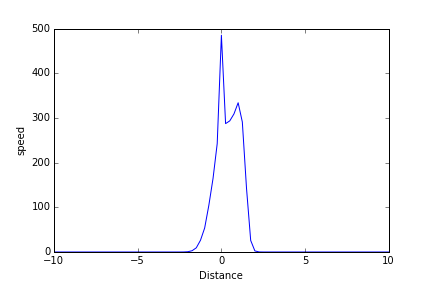
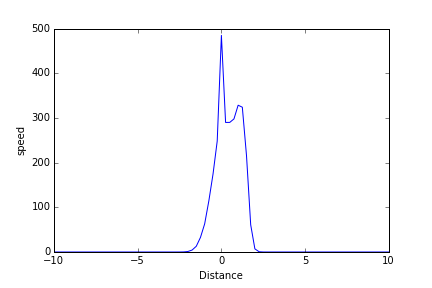
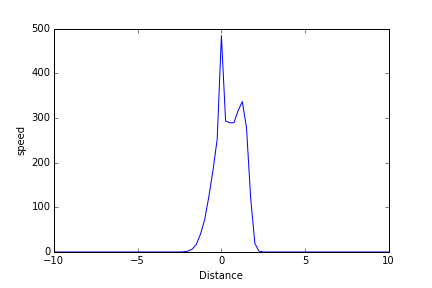
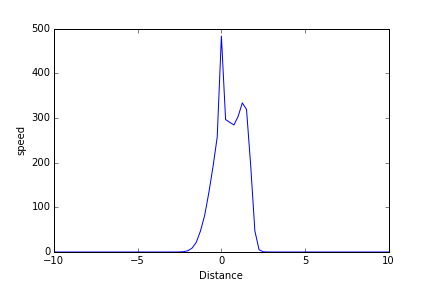
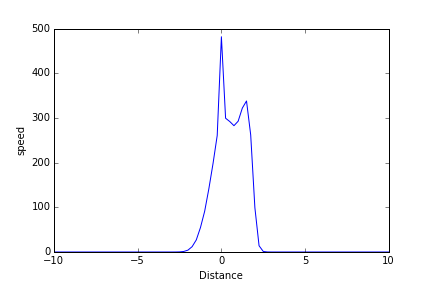
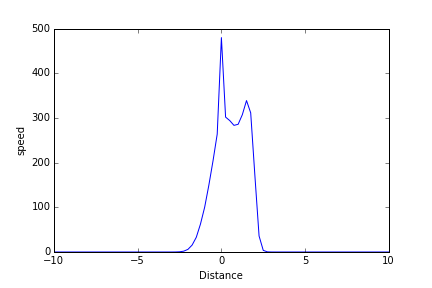
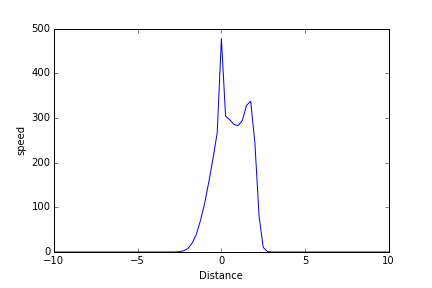
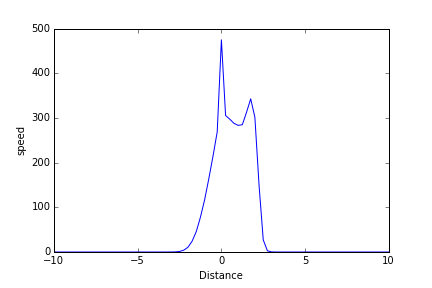
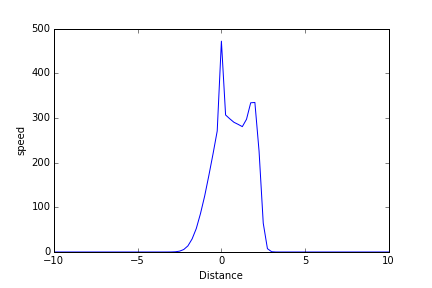
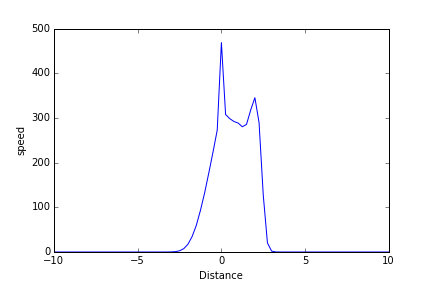
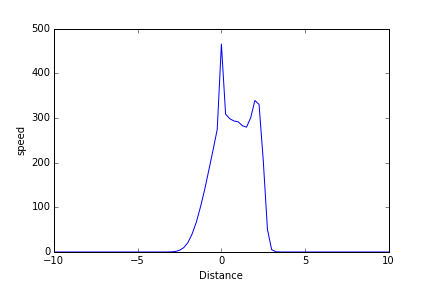
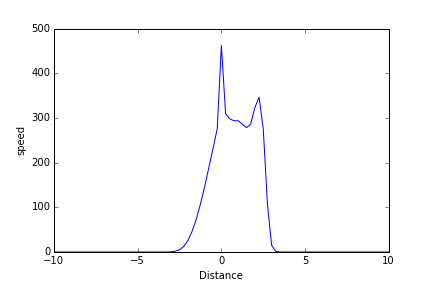
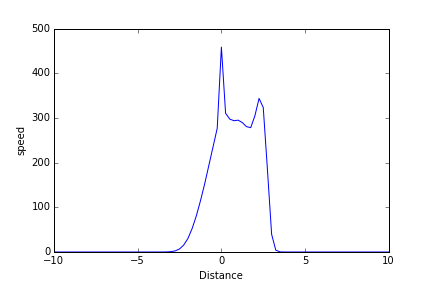
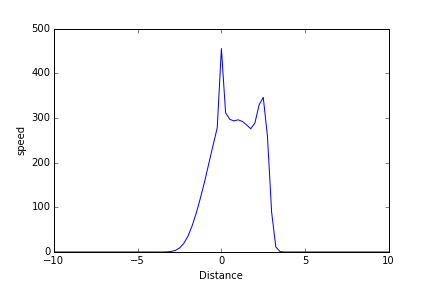
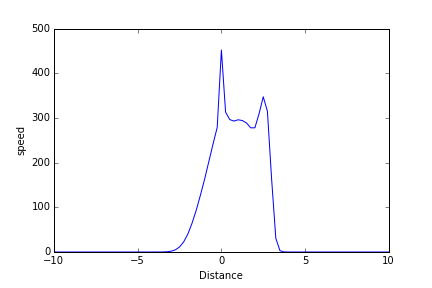
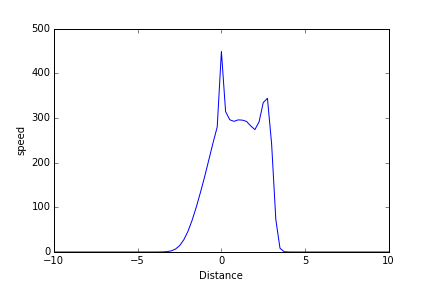
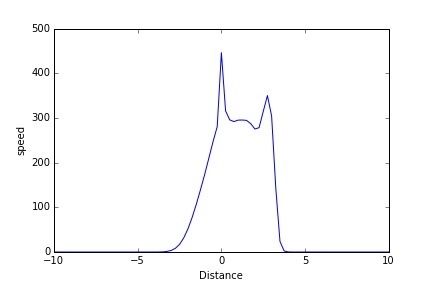
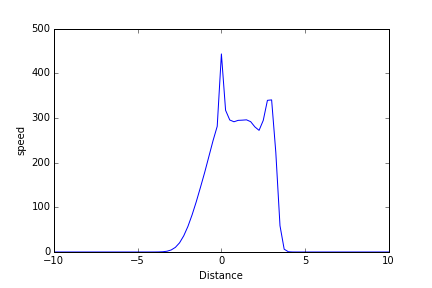
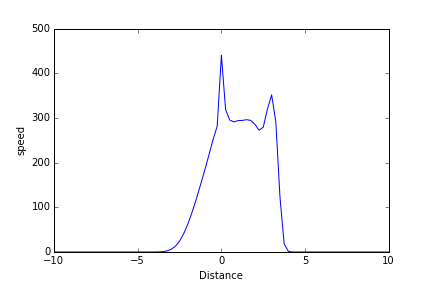
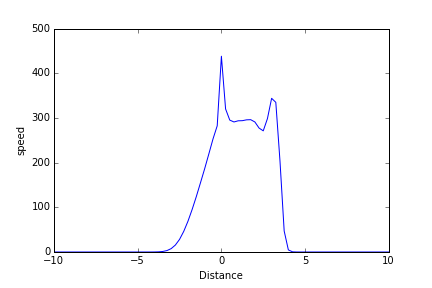
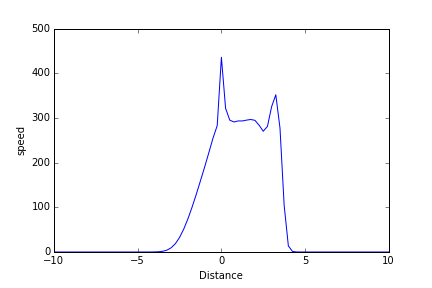
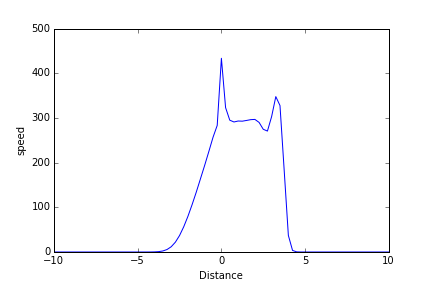
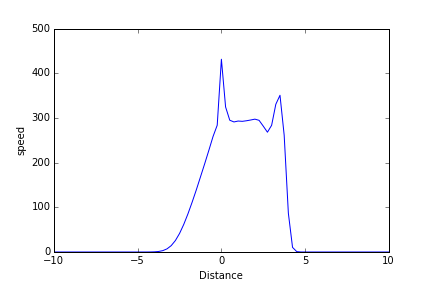
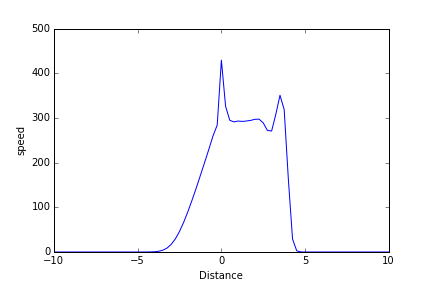
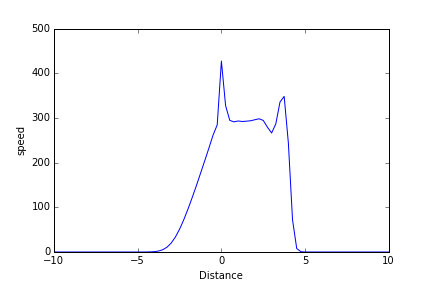
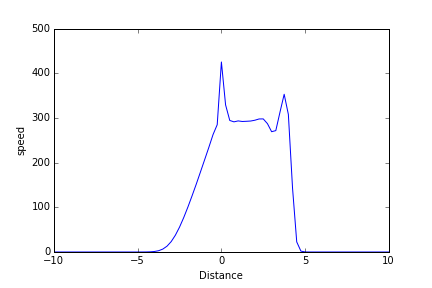
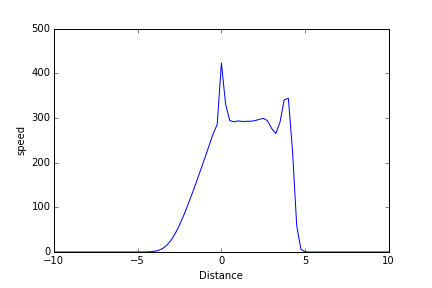
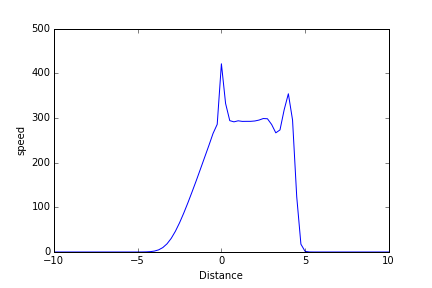
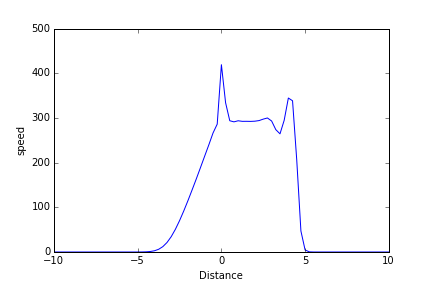
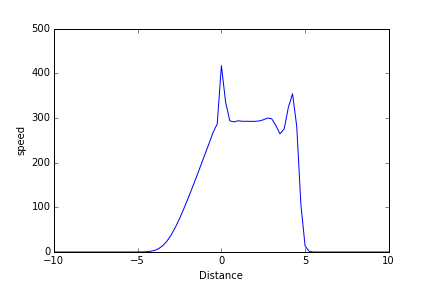
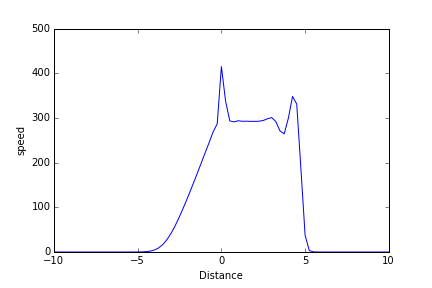
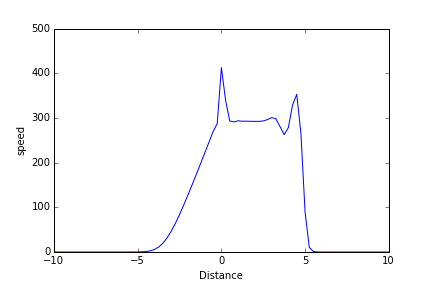
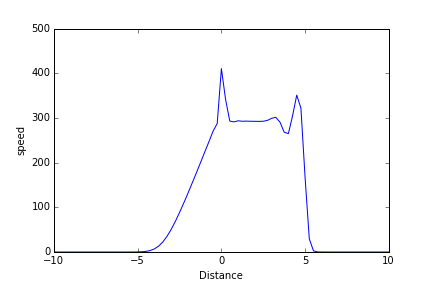
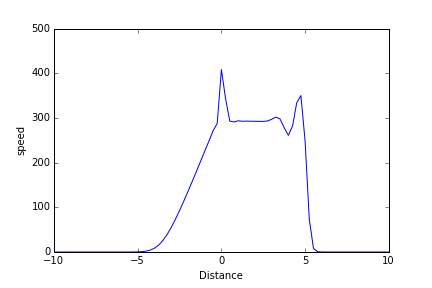
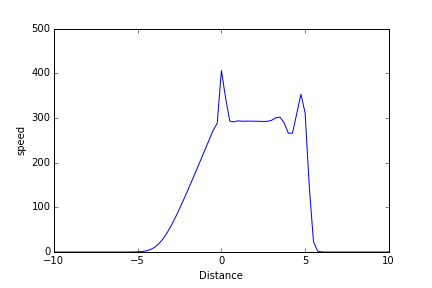
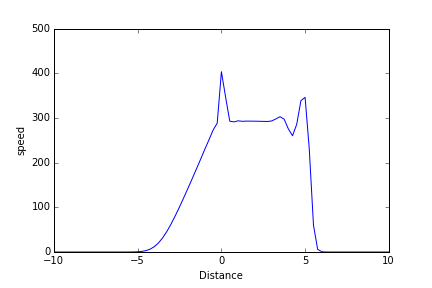

In [22]:
# Creation of the animation for speed
fig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(0, 500),xlabel=('Distance'),ylabel=('speed'));
line = ax.plot([], [])[0]

anim.FuncAnimation(fig, animate, frames=u[:,:,1]/u[:,:,0], interval=80)

Here is an animation of the evolution of the pressure of the gas along the tube.


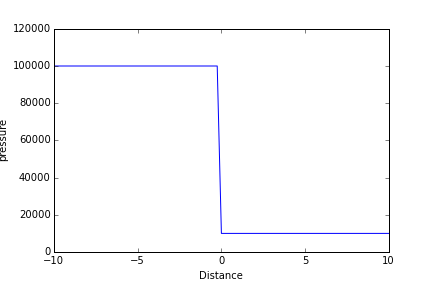
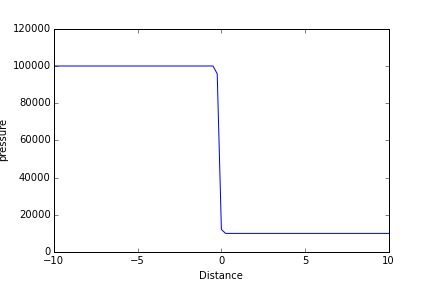
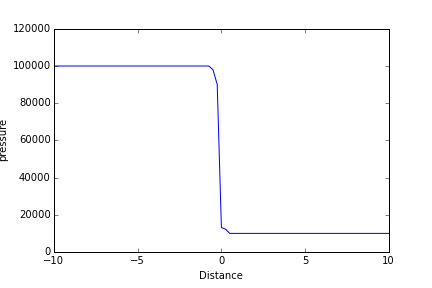
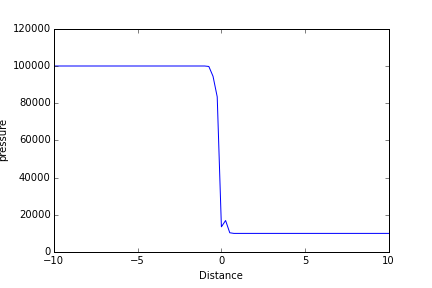
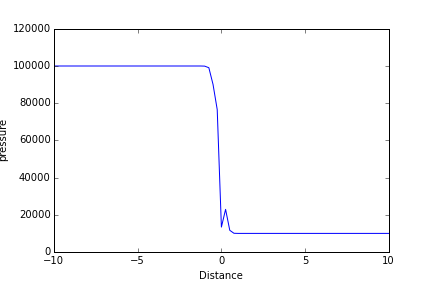
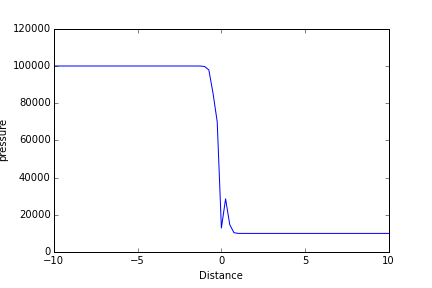
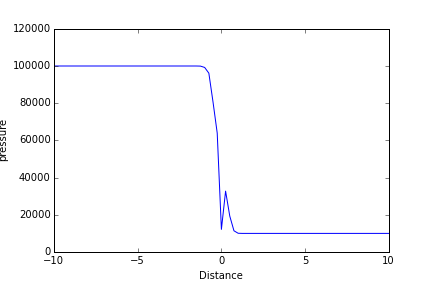
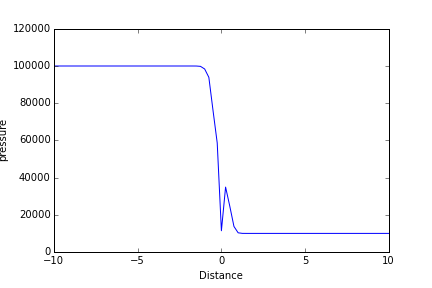
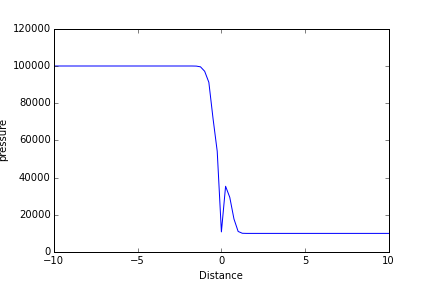
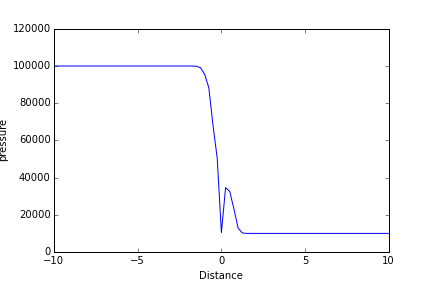
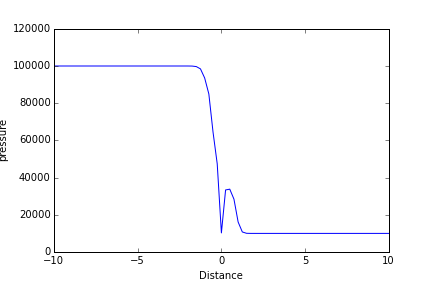
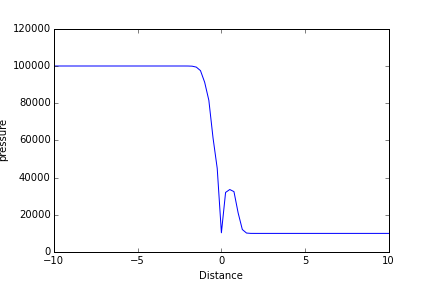
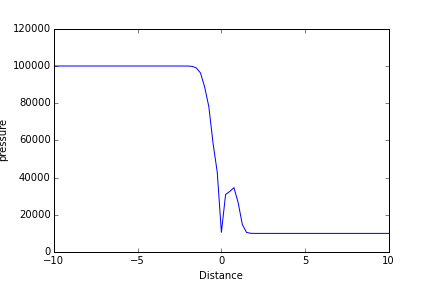
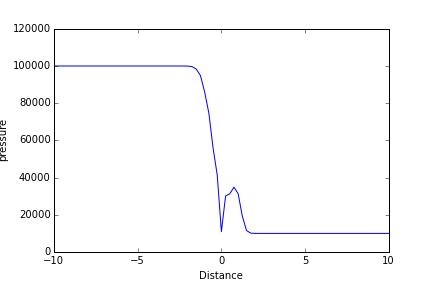
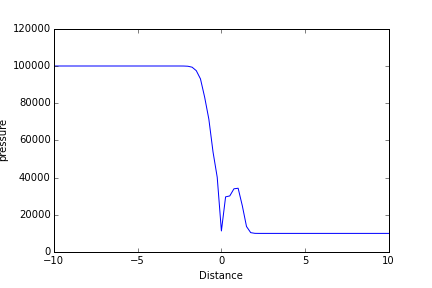
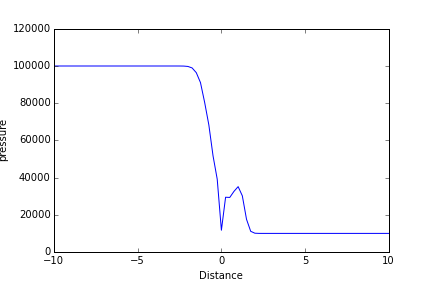
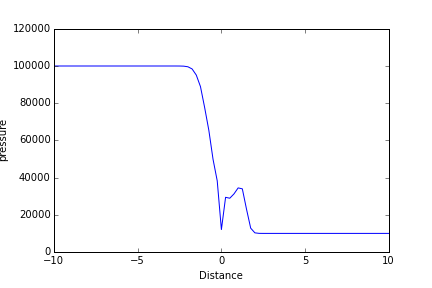
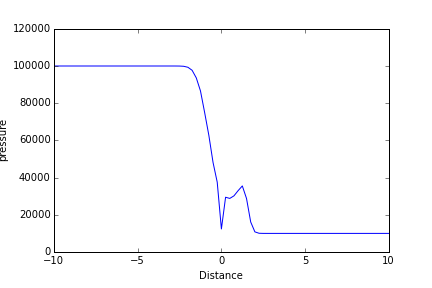
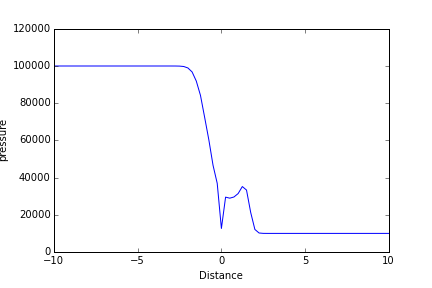
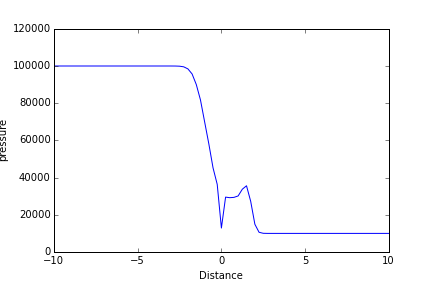
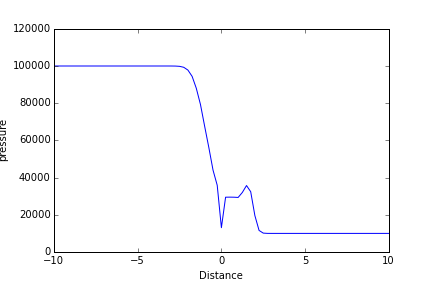
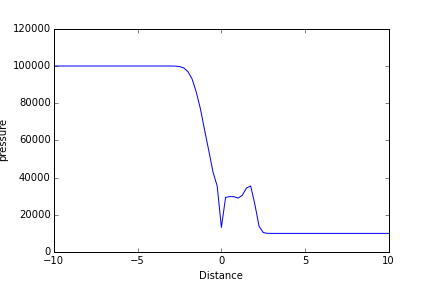
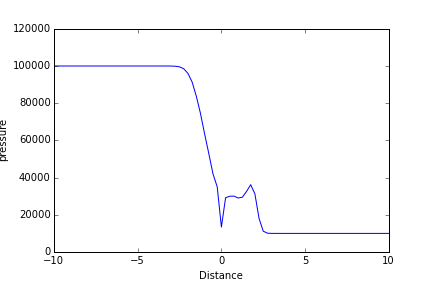
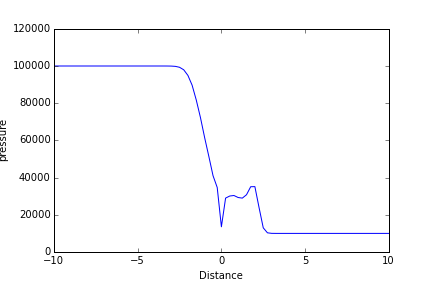
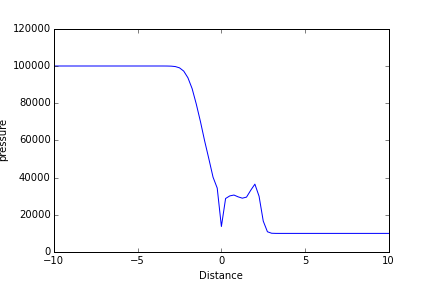
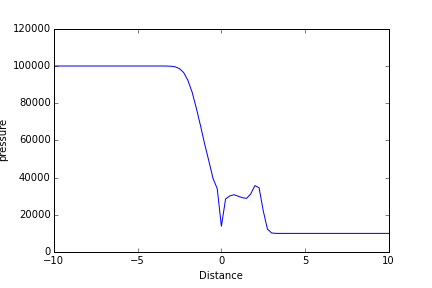
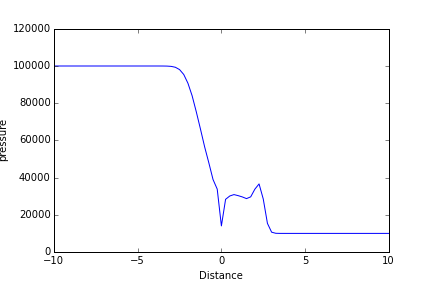
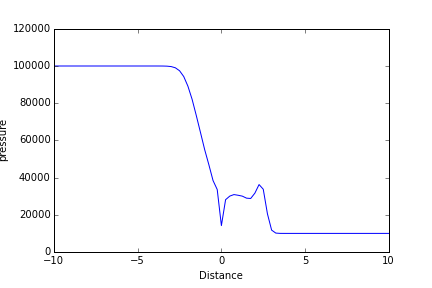
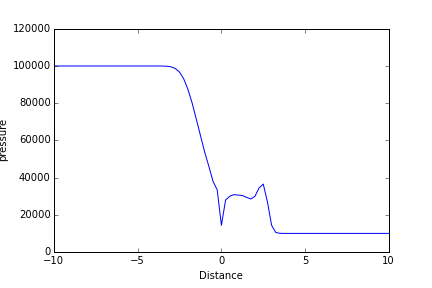
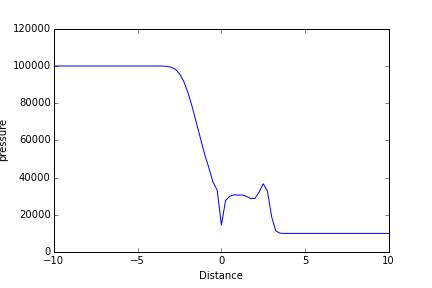
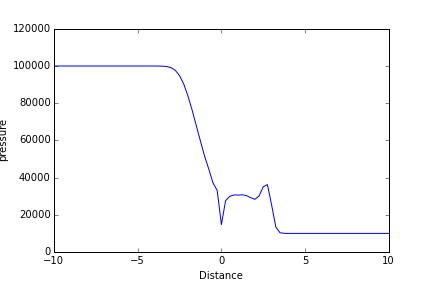
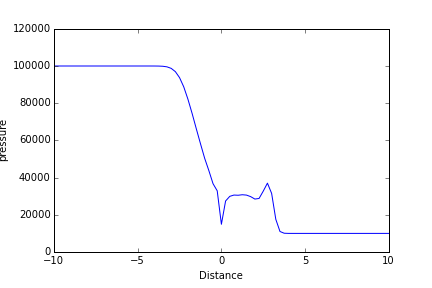
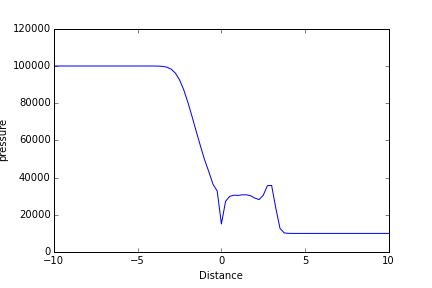
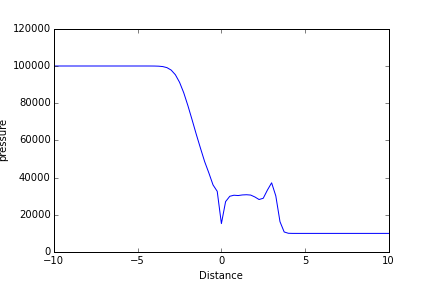
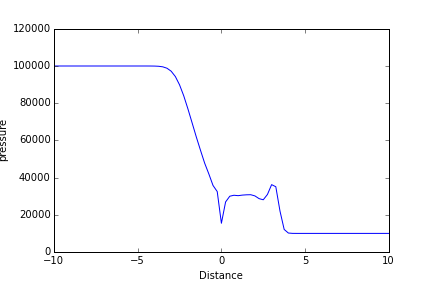
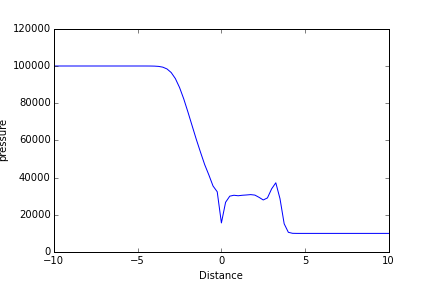
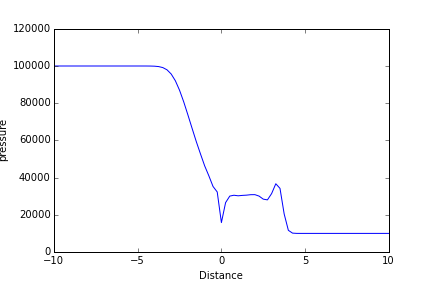
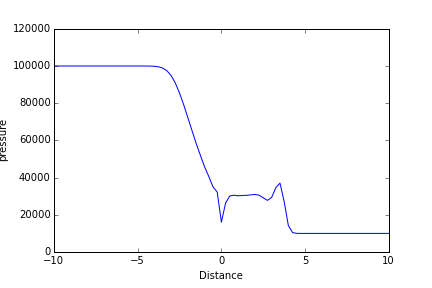
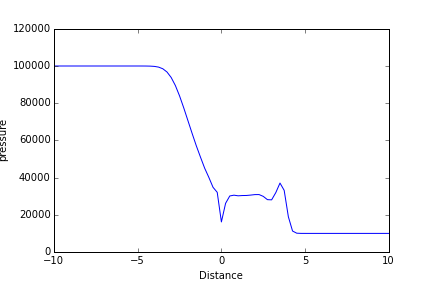
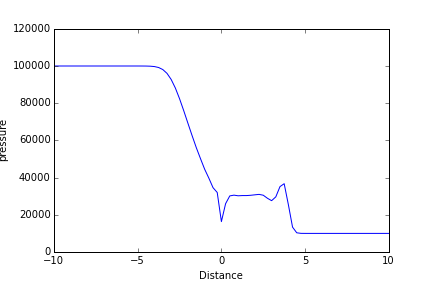
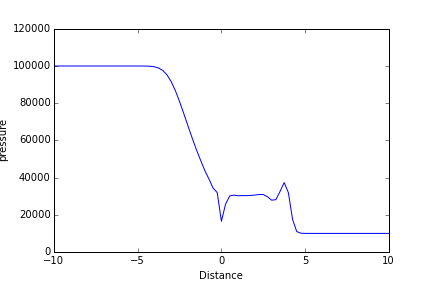
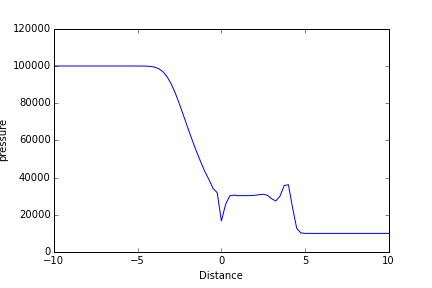
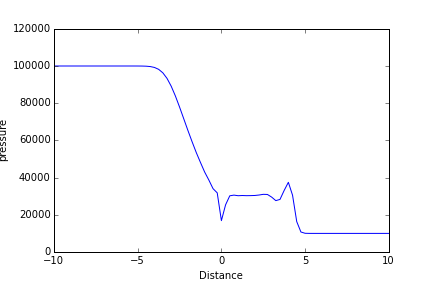
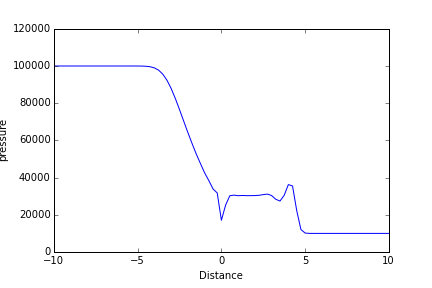
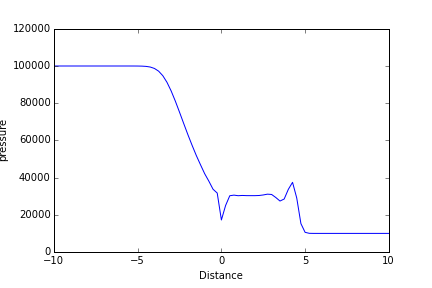
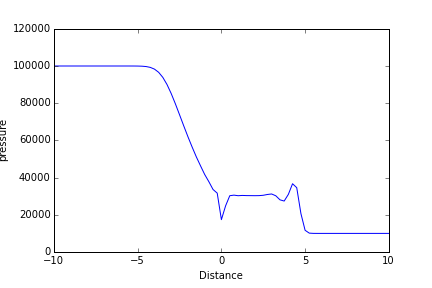
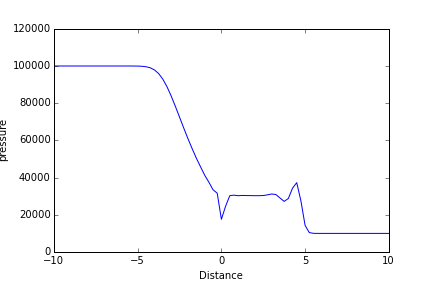
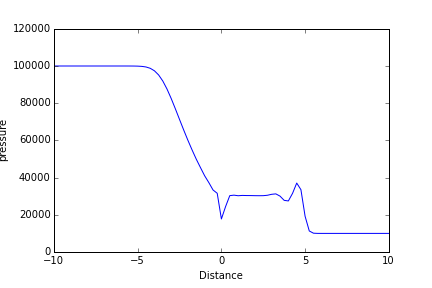
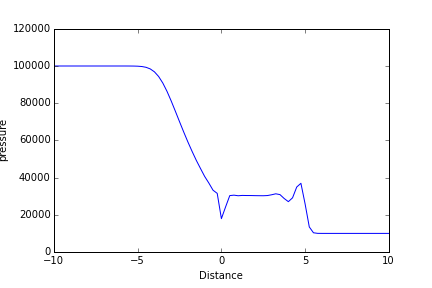
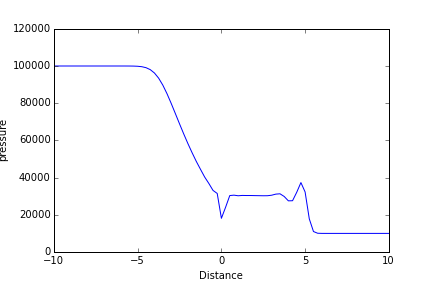
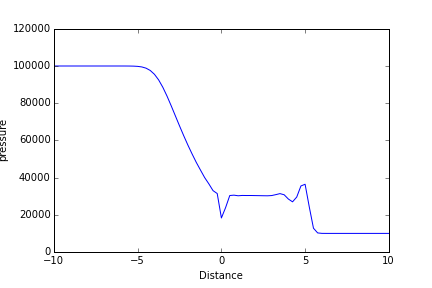

In [23]:
# Creation of the animation for pressure
fig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(0, 120000),xlabel=('Distance'),ylabel=('pressure'));
line = ax.plot([], [])[0]

anim.FuncAnimation(fig, animate, \
    frames=((u[:, :, 2] - \
    0.5*u[:, :, 0]*(u[:, :, 1]/u[:, :, 0])**2)*(gamma - 1)), \
    interval=80)

Here is an animation of the evolution of the density of the gas along the tube.


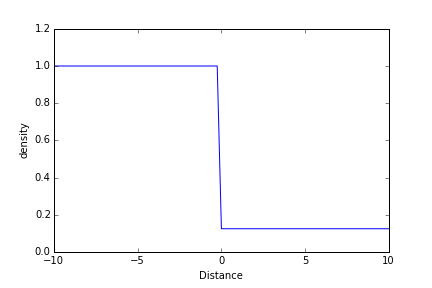
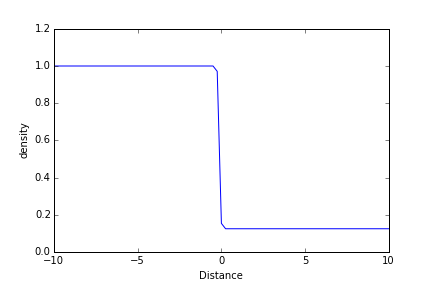
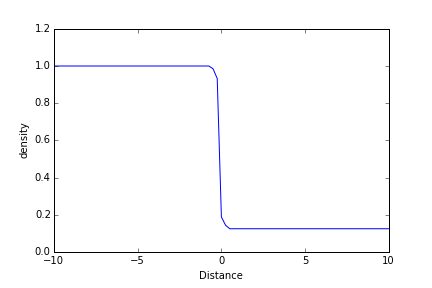
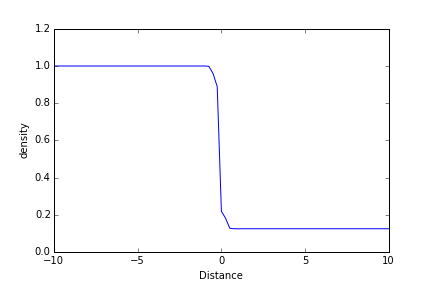
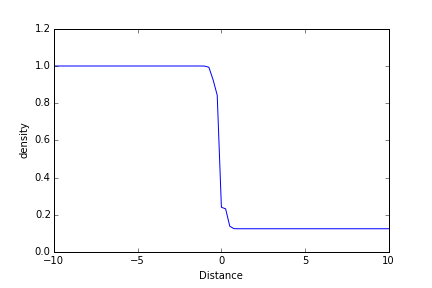
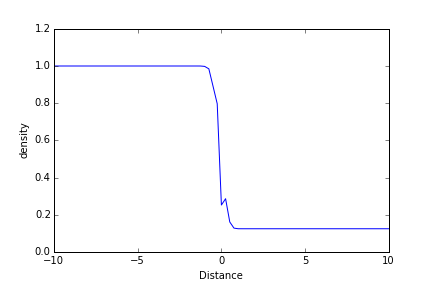
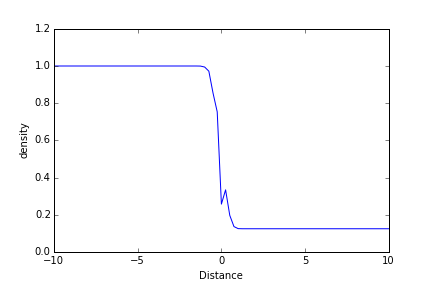
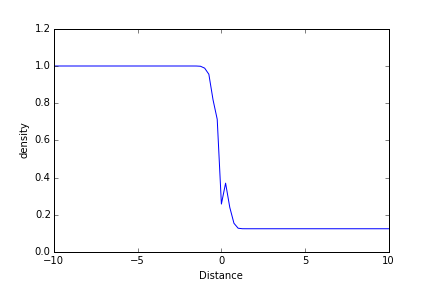
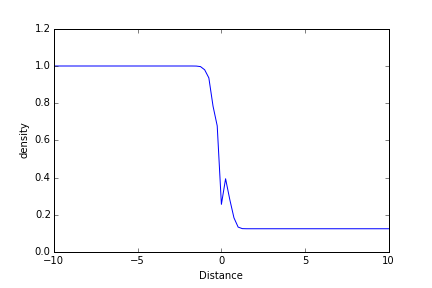
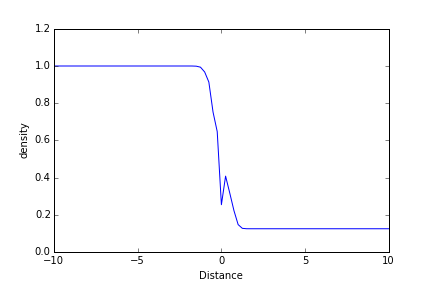
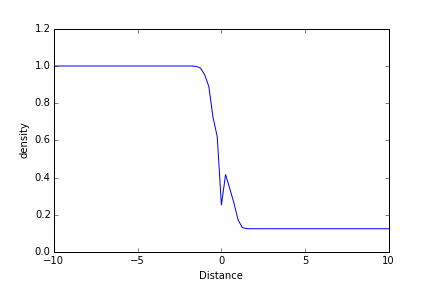
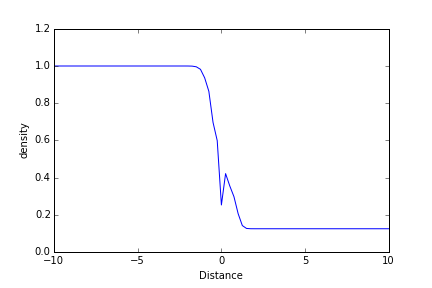
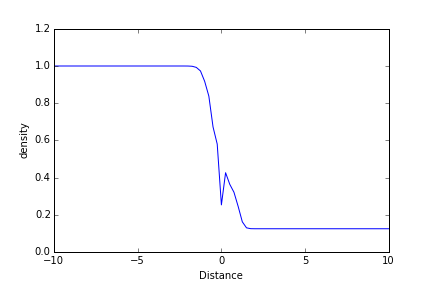
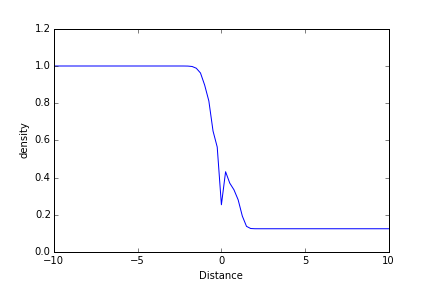
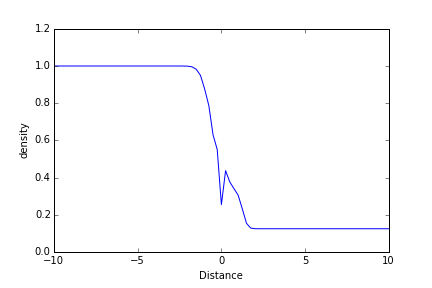
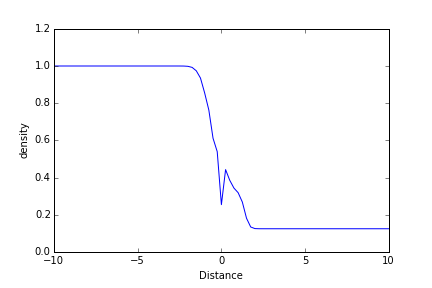
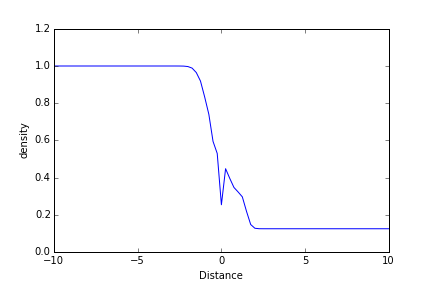
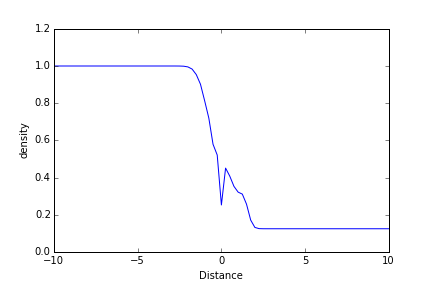
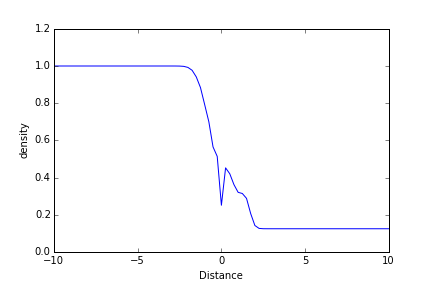
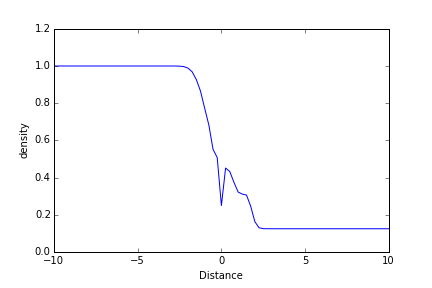
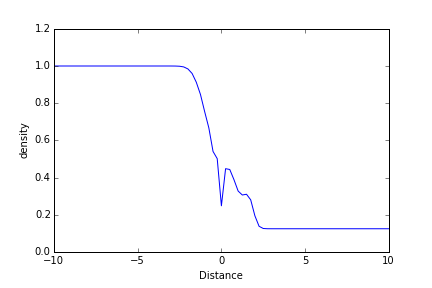
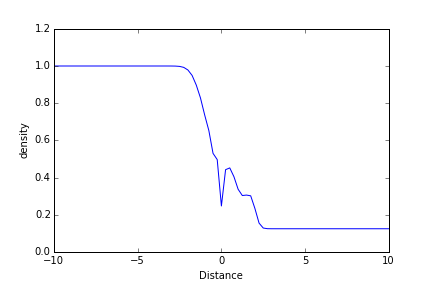
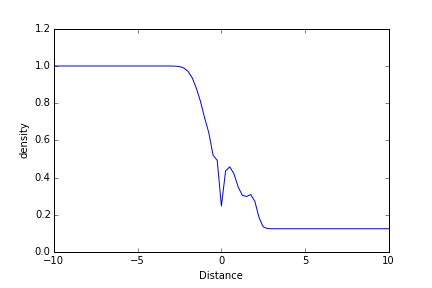
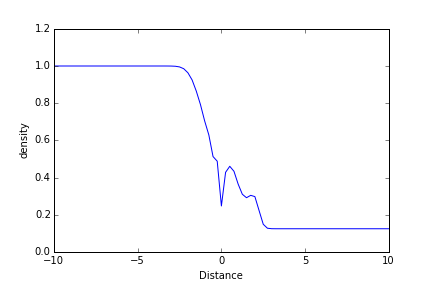
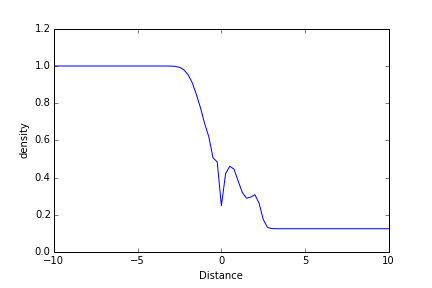
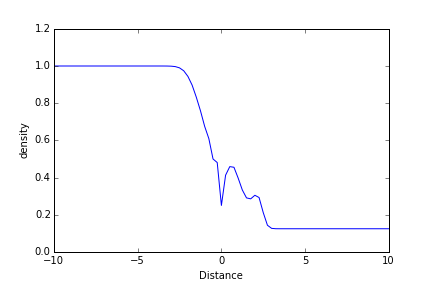
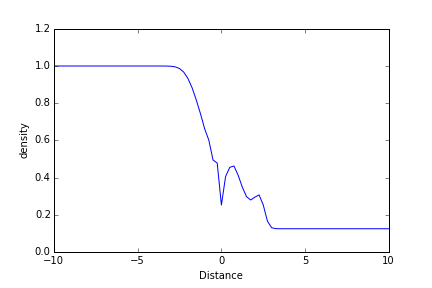
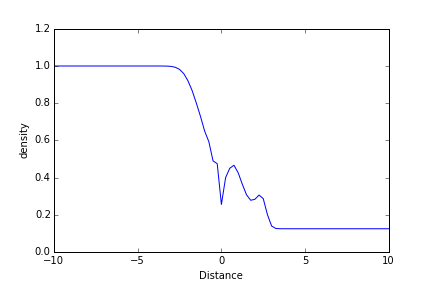
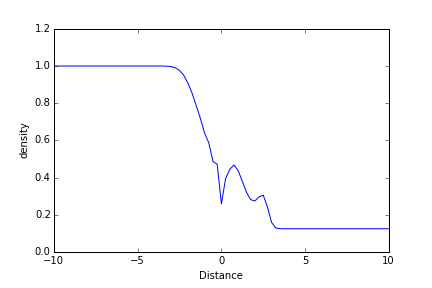
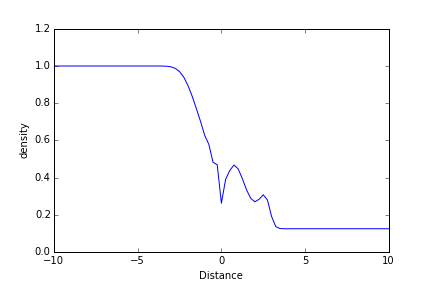
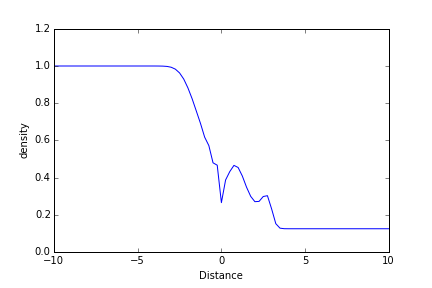
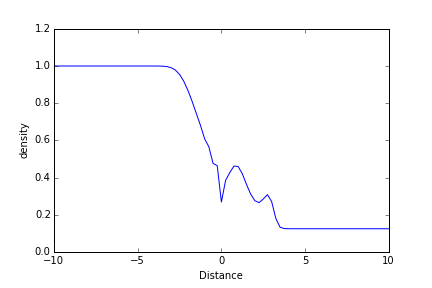
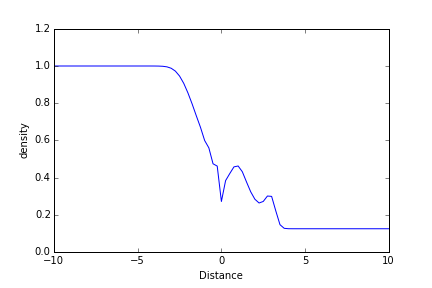
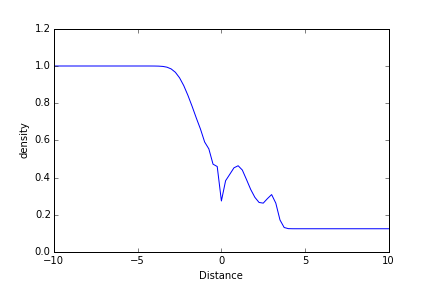
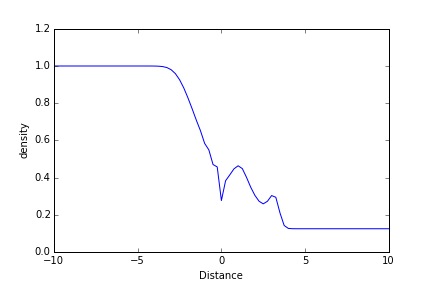
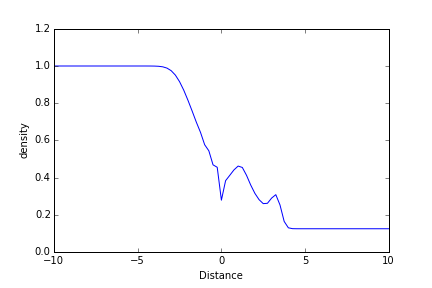
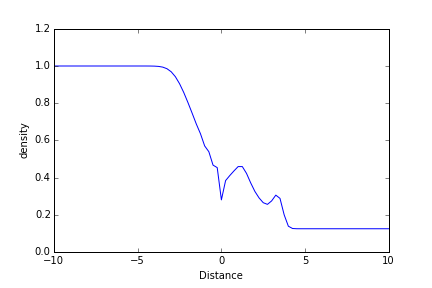
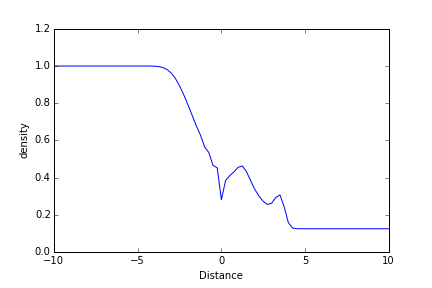
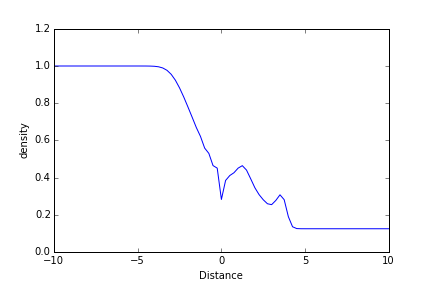
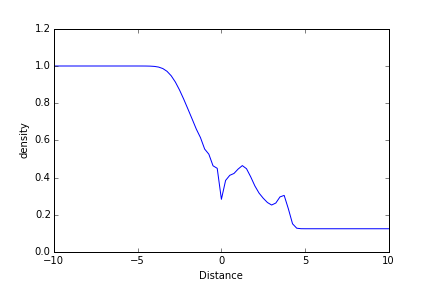
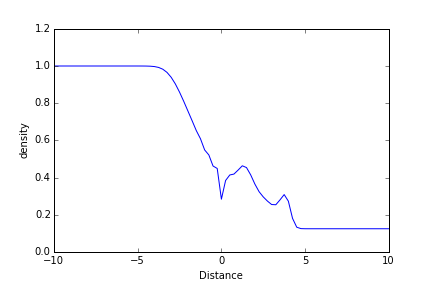
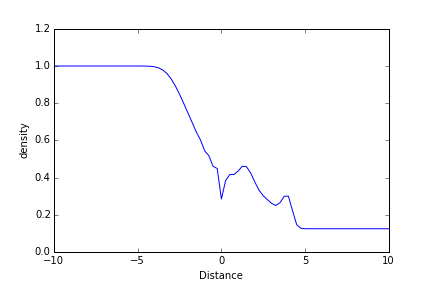
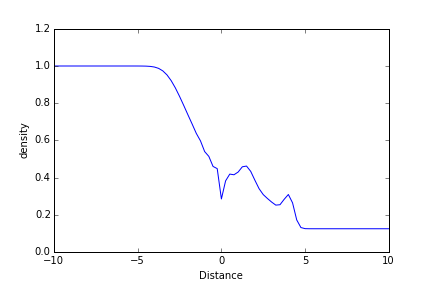
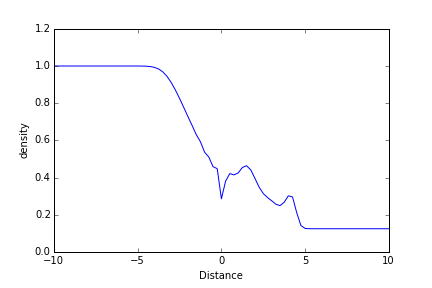
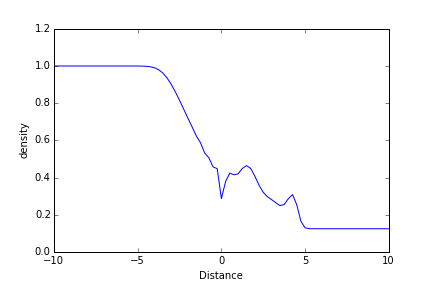
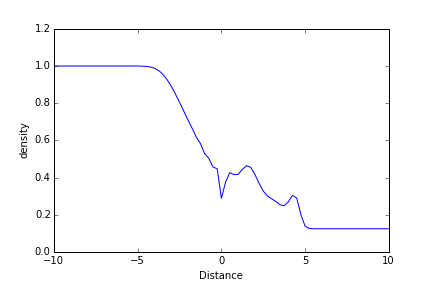
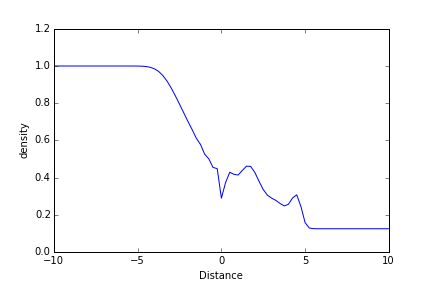
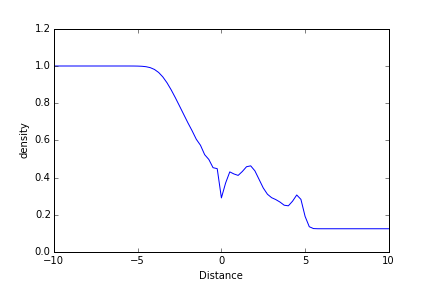
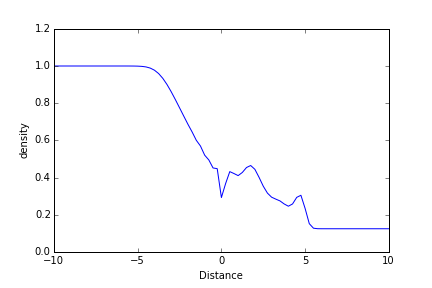
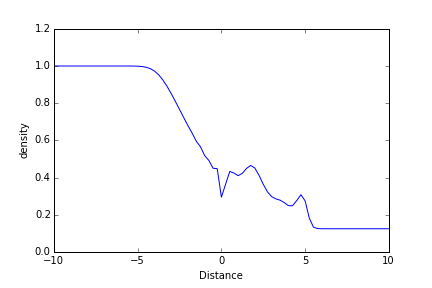
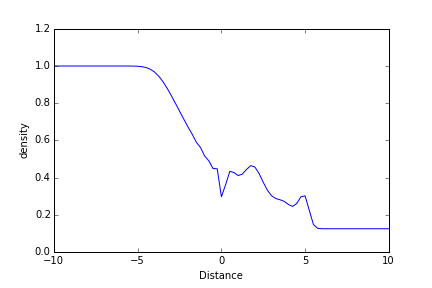

In [24]:
# Function used to create the line at each moment
def animate(y):
    line.set_data(x, y)

# Creation of the animation for density
fig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(0, 1.2),xlabel=('Distance'),ylabel=('density'));
line = ax.plot([], [])[0]

anim.FuncAnimation(fig, animate, frames=u[:,:,0], interval=80)

## Conclusion


Our solutions seem legit from a physical perspective. Indeed, we can see the high pressure and high density gas flowing, as a shock wave, through the low pressure gas as the system goes towards an equilibrium.
We can also see the limits of the numerical methods at the edges of the shock waves. Let's compare our results, with the Richtmyer method, to the analytic results of this problem shown in the picture below.

![shock_analytic](../../lessons/03_wave/figures/shock_tube_.01.png)

As we see, our method has some limitation, especially on the edge of the shock wave. Nevertheless, the overall result is pretty close to the analytical results in a first approximation.

##### Source

(1) We used the following lectures https://github.com/numerical-mooc/numerical-mooc available under Creative Commons Attribution license CC-BY 4.0, (c)2014 L.A. Barba, C. Cooper, G.F. Forsyth, A. Krishnan.

---
###### The cell below loads the style of this notebook. 

In [9]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())